In [56]:
###capstone GAMING

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import dill

In [58]:

with open('df_game_clean.pkd', 'rb') as f:
    df_game = dill.load(f)

In [59]:
df_game.describe()

,Price
count,2.304840e+05
mean,1.510790e+03
std,3.552538e+03
min,4.000000e+00
25%,9.932500e+02
50%,1.309000e+03
75%,1.799990e+03
max,1.669366e+06


In [60]:
df_game.head()

,ASIN,Date,Price
0,B00ETM09LK,2015/06/25,999.99
1,B00ETM09LK,2015/06/26,999.00
2,B00ETM09LK,2015/07/15,998.99
3,B00ETM09LK,2015/08/16,998.49
4,B00ETM09LK,2015/08/17,998.19


In [61]:
df_game.tail()

,ASIN,Date,Price
241396,B0BLH4R831,2022/11/21,1019.79
241397,B0BLH4R831,2022/11/21,1015.79
241398,B0BLH4R831,2022/11/22,1009.79
241399,B0BLH4R831,2022/11/23,1005.79
241400,B0BLH4R831,2022/11/24,1269.00


In [62]:
df_game.shape

(241401, 3)

In [63]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241401 entries, 0 to 241400
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ASIN    241401 non-null  object 
 1   Date    241401 non-null  object 
 2   Price   230484 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.5+ MB


In [64]:
df_game.isnull().sum()

ASIN         0
Date         0
Price    10917
dtype: int64

In [65]:
df_game.dropna(inplace=True)

In [66]:
df_game

,ASIN,Date,Price
0,B00ETM09LK,2015/06/25,999.99
1,B00ETM09LK,2015/06/26,999.00
2,B00ETM09LK,2015/07/15,998.99
3,B00ETM09LK,2015/08/16,998.49
4,B00ETM09LK,2015/08/17,998.19
...,...,...,...
241396,B0BLH4R831,2022/11/21,1019.79
241397,B0BLH4R831,2022/11/21,1015.79
241398,B0BLH4R831,2022/11/22,1009.79
241399,B0BLH4R831,2022/11/23,1005.79


In [67]:
df_game.reset_index(inplace=True)

In [68]:
df_game

,index,ASIN,Date,Price
0,0,B00ETM09LK,2015/06/25,999.99
1,1,B00ETM09LK,2015/06/26,999.00
2,2,B00ETM09LK,2015/07/15,998.99
3,3,B00ETM09LK,2015/08/16,998.49
4,4,B00ETM09LK,2015/08/17,998.19
...,...,...,...,...
230479,241396,B0BLH4R831,2022/11/21,1019.79
230480,241397,B0BLH4R831,2022/11/21,1015.79
230481,241398,B0BLH4R831,2022/11/22,1009.79
230482,241399,B0BLH4R831,2022/11/23,1005.79


In [69]:
len(pd.unique(df_game['ASIN']))

2873

In [70]:
ASIN = df_game['ASIN'].unique()

In [71]:
ASIN

array(['B00ETM09LK', 'B00S9SHV3O', 'B00VBOCI9K', ..., 'B0BLGYMB34',
       'B0BLH3751Y', 'B0BLH4R831'], dtype=object)

In [72]:
df_game.groupby(['ASIN']).agg({'Price': ['count', 'mean', 'median', 'std', 'min', 'max'] })

Price                                                     
           count         mean    median         std      min      max
ASIN                                                                 
B00ETM09LK   325   863.428892   839.700  123.257549   759.00  1869.28
B00S9SHV3O    50  1198.702600  1274.555  222.268531   659.00  1399.99
B00VBOCI9K    91  1357.558571  1280.010  291.925772   937.05  2143.50
B00VBOCIE0   147  1367.977959  1220.000  336.242761   999.00  2244.87
B00WM4QSVM    14   856.496429   849.000   50.839378   799.00   929.00
...          ...          ...       ...         ...      ...      ...
B0BLCFMB9F    14  1516.338571  1550.180   75.206791  1342.27  1553.63
B0BLGRTW42    44  2291.921818  2241.950  144.524207  2088.98  2540.99
B0BLGYMB34    49  4007.375510  4100.660  190.143303  3724.31  4306.98
B0BLH3751Y    34  3424.935588  3370.630  116.408420  3329.99  3750.28
B0BLH4R831    11  1092.665455  1019.790  114.726510  1005.79  1269.00

[2873 rows x 6 columns]

In [73]:
df_abstract = df_game.groupby(['ASIN']).agg({'Price': ['count', 'mean', 'median', 'std', 'min', 'max'] })

In [74]:
df_game['Date'] = pd.to_datetime(df_game['Date'])

In [75]:
df_game.drop('index', axis=1, inplace=True)

In [76]:
df_game

,ASIN,Date,Price
0,B00ETM09LK,2015-06-25,999.99
1,B00ETM09LK,2015-06-26,999.00
2,B00ETM09LK,2015-07-15,998.99
3,B00ETM09LK,2015-08-16,998.49
4,B00ETM09LK,2015-08-17,998.19
...,...,...,...
230479,B0BLH4R831,2022-11-21,1019.79
230480,B0BLH4R831,2022-11-21,1015.79
230481,B0BLH4R831,2022-11-22,1009.79
230482,B0BLH4R831,2022-11-23,1005.79


In [77]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230484 entries, 0 to 230483
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ASIN    230484 non-null  object        
 1   Date    230484 non-null  datetime64[ns]
 2   Price   230484 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.3+ MB


In [78]:
df_game.groupby(['ASIN']).agg({'Date': ['count',  'min', 'max'] })

Date                      
           count        min        max
ASIN                                  
B00ETM09LK   325 2015-06-25 2022-07-12
B00S9SHV3O    50 2015-02-08 2022-07-18
B00VBOCI9K    91 2015-05-02 2022-08-24
B00VBOCIE0   147 2015-06-27 2020-09-03
B00WM4QSVM    14 2020-09-07 2022-11-11
...          ...        ...        ...
B0BLCFMB9F    14 2022-11-04 2022-11-28
B0BLGRTW42    44 2022-11-08 2022-11-30
B0BLGYMB34    49 2022-11-06 2022-11-30
B0BLH3751Y    34 2022-11-15 2022-11-29
B0BLH4R831    11 2022-11-07 2022-11-24

[2873 rows x 3 columns]

In [79]:
def date_time_features(df):
    """
    time series features based on time series index.
    """
    df = df.copy()
    #df['hour'] = df.index.hour
    df['dayofweek'] = df.Date.dt.dayofweek
    df['quarter'] = df.Date.dt.quarter
    df['month'] = df.Date.dt.month
    df['year'] = df.Date.dt.year
    df['dayofyear'] = df.Date.dt.dayofyear
    df['dayofmonth'] = df.Date.dt.day
    df['weekofyear'] = df.Date.dt.isocalendar().week.astype("int64")
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 11]), 3, df["season"])
    return df

In [80]:
df1= date_time_features(df_game)
df1

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,B00ETM09LK,2015-06-25,999.99,3,2,6,2015,176,25,26,2
1,B00ETM09LK,2015-06-26,999.00,4,2,6,2015,177,26,26,2
2,B00ETM09LK,2015-07-15,998.99,2,3,7,2015,196,15,29,2
3,B00ETM09LK,2015-08-16,998.49,6,3,8,2015,228,16,33,2
4,B00ETM09LK,2015-08-17,998.19,0,3,8,2015,229,17,34,2
...,...,...,...,...,...,...,...,...,...,...,...
230479,B0BLH4R831,2022-11-21,1019.79,0,4,11,2022,325,21,47,3
230480,B0BLH4R831,2022-11-21,1015.79,0,4,11,2022,325,21,47,3
230481,B0BLH4R831,2022-11-22,1009.79,1,4,11,2022,326,22,47,3
230482,B0BLH4R831,2022-11-23,1005.79,2,4,11,2022,327,23,47,3


In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230484 entries, 0 to 230483
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ASIN        230484 non-null  object        
 1   Date        230484 non-null  datetime64[ns]
 2   Price       230484 non-null  float64       
 3   dayofweek   230484 non-null  int64         
 4   quarter     230484 non-null  int64         
 5   month       230484 non-null  int64         
 6   year        230484 non-null  int64         
 7   dayofyear   230484 non-null  int64         
 8   dayofmonth  230484 non-null  int64         
 9   weekofyear  230484 non-null  int64         
 10  season      230484 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(1)
memory usage: 18.5+ MB


In [82]:
## Lag features and window features

In [83]:
# ### Because they are based on the idea that the past might impact the present or even hold some sort of inherent knowledge 
# about the future, lag features are values at earlier timesteps that are deemed valuable. 
# For instance, if you want to forecast comparable price the next week, it can be helpful to generate characteristics 
# for price that occurred the prior week 

In [84]:
def lag_features(df, lags):
    for lag in lags:
        df['price_lag_' + str(lag)] = df.groupby(["ASIN"])['Price'].transform(lambda x: x.shift(lag))
    return df

In [85]:
# Our main goal is to identify the trend, seasonality, and level. 
# This time period has been added in increments of three months, such as three months + one week, three months plus two weeks, 
# six months, etc., because it is three months long.

In [86]:
df1= lag_features(df1, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
0,B00ETM09LK,2015-06-25,999.99,3,2,6,2015,176,25,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00ETM09LK,2015-06-26,999.00,4,2,6,2015,177,26,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00ETM09LK,2015-07-15,998.99,2,3,7,2015,196,15,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00ETM09LK,2015-08-16,998.49,6,3,8,2015,228,16,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00ETM09LK,2015-08-17,998.19,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
230479,B0BLH4R831,2022-11-21,1019.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230480,B0BLH4R831,2022-11-21,1015.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230481,B0BLH4R831,2022-11-22,1009.79,1,4,11,2022,326,22,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230482,B0BLH4R831,2022-11-23,1005.79,2,4,11,2022,327,23,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230483,B0BLH4R831,2022-11-24,1269.00,3,4,11,2022,328,24,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Rolling Mean Features
# The moving average feature is derived using the rolling approach. 
# The window argument also conveys the number of steps remaining. Past 2-3-5 numbers, on average, etc.

# When employing the rolling approach, it takes into account all past averages, 
# including itself. This is a problem. Therefore, after receiving a delay, we must produce the moving average feature.

In [89]:
def roll_mean_features(df, windows):
    for window in windows:
        df['price_roll_mean_' + str(window)] = df.groupby(["ASIN"])['Price']. \
                                             transform(lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean())
    return df

In [90]:
# to reflect information about 1 and 1.5 years ago in the data:

In [91]:
df1= roll_mean_features(df1, [365, 546])

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
0,B00ETM09LK,2015-06-25,999.99,3,2,6,2015,176,25,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00ETM09LK,2015-06-26,999.00,4,2,6,2015,177,26,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00ETM09LK,2015-07-15,998.99,2,3,7,2015,196,15,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00ETM09LK,2015-08-16,998.49,6,3,8,2015,228,16,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00ETM09LK,2015-08-17,998.19,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
230479,B0BLH4R831,2022-11-21,1019.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230480,B0BLH4R831,2022-11-21,1015.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230481,B0BLH4R831,2022-11-22,1009.79,1,4,11,2022,326,22,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230482,B0BLH4R831,2022-11-23,1005.79,2,4,11,2022,327,23,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230483,B0BLH4R831,2022-11-24,1269.00,3,4,11,2022,328,24,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1087.581273,1088.8362


In [93]:
# Exponentially Weighted Mean Features
# design features whose values of exponential moving average match to various alpha values.

In [94]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['price_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["ASIN"])['Price'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

In [95]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags   = [91, 98, 105, 112, 180, 270, 365, 546, 728]


df1= ewm_features(df1, alphas, lags)

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
0,B00ETM09LK,2015-06-25,999.99,3,2,6,2015,176,25,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00ETM09LK,2015-06-26,999.00,4,2,6,2015,177,26,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00ETM09LK,2015-07-15,998.99,2,3,7,2015,196,15,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00ETM09LK,2015-08-16,998.49,6,3,8,2015,228,16,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00ETM09LK,2015-08-17,998.19,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
230479,B0BLH4R831,2022-11-21,1019.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230480,B0BLH4R831,2022-11-21,1015.79,0,4,11,2022,325,21,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230481,B0BLH4R831,2022-11-22,1009.79,1,4,11,2022,326,22,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230482,B0BLH4R831,2022-11-23,1005.79,2,4,11,2022,327,23,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230483,B0BLH4R831,2022-11-24,1269.00,3,4,11,2022,328,24,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df1.shape

(230484, 68)

In [105]:
# One-Hot-Encoding

In [106]:
df2 = pd.get_dummies(df1, columns=[ 'dayofweek', "quarter", 'month', "year", "season"])
df2.shape

(230484, 98)

In [107]:
df2.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00ETM09LK,2015-06-25,999.99,176,25,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00ETM09LK,2015-06-26,999.00,177,26,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00ETM09LK,2015-07-15,998.99,196,15,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00ETM09LK,2015-08-16,998.49,228,16,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00ETM09LK,2015-08-17,998.19,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [108]:
###Logarithmic Transformation for Sales data

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

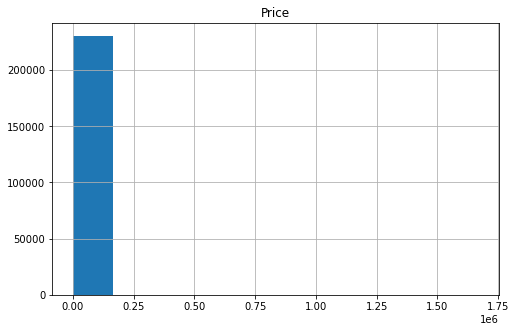

In [109]:
df2.hist('Price',figsize=(8,5))

In [110]:
df2['Price']= np.log1p(df2["Price"].values)
df2.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00ETM09LK,2015-06-25,6.908745,176,25,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00ETM09LK,2015-06-26,6.907755,177,26,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00ETM09LK,2015-07-15,6.907745,196,15,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00ETM09LK,2015-08-16,6.907245,228,16,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00ETM09LK,2015-08-17,6.906945,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

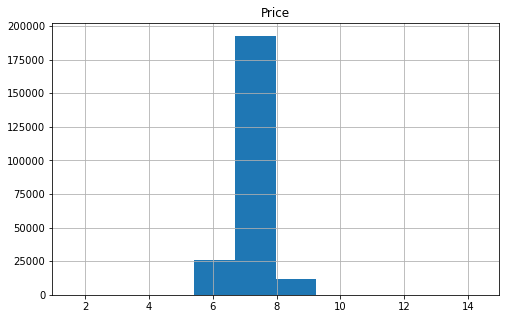

In [111]:
df2.hist('Price',figsize=(8,5))

In [112]:
# Splitting Train and Test

In [113]:
df_model= df2.copy()

In [114]:
from sklearn.model_selection import train_test_split

In [144]:
train, val = train_test_split(df_model, test_size=0.2, random_state=None, shuffle=False)

In [145]:
train

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00ETM09LK,2015-06-25,6.908745,176,25,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00ETM09LK,2015-06-26,6.907755,177,26,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00ETM09LK,2015-07-15,6.907745,196,15,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00ETM09LK,2015-08-16,6.907245,228,16,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00ETM09LK,2015-08-17,6.906945,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184382,B09K4Z6QXK,2022-08-15,7.104957,227,15,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
184383,B09K4Z6QXK,2022-08-17,7.085056,229,17,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
184384,B09K4Z6QXK,2022-09-01,7.076645,244,1,35,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184385,B09K4Z6QXK,2022-09-03,7.084218,246,3,35,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [146]:
val

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
184387,B09K4Z6QXK,2022-10-04,7.073261,277,4,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184388,B09K4Z6QXK,2022-10-05,7.080018,278,5,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184389,B09K4Z6QXK,2022-10-06,7.079176,279,6,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184390,B09K4Z6QXK,2022-10-07,7.077498,280,7,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184391,B09K4Z6QXK,2022-10-08,7.079176,281,8,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230479,B0BLH4R831,2022-11-21,6.928332,325,21,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
230480,B0BLH4R831,2022-11-21,6.924406,325,21,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
230481,B0BLH4R831,2022-11-22,6.918487,326,22,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
230482,B0BLH4R831,2022-11-23,6.914522,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [147]:
cols = [col for col in train.columns if col not in ['Date', 'ASIN', "Price", "year"]]

In [148]:
X_train = train[cols]
Y_train = train['Price']

X_val = val[cols]
Y_val = val['Price']

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((184387, 95), (184387,), (46097, 95), (46097,))

In [136]:
###Building and Running XGB Regressor

In [149]:
# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

def xgb_smape(y_pred, y_true):
    smape_val = smape(np.expm1(preds), np.expm1(y_true))
    return 'SMAPE', smape_val, False

In [61]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
import xgboost as xgb

In [150]:
model= xgb.XGBRegressor()

In [151]:
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# To assess the variation between predictions and actual data, 
# the SMAPE (Symmetric mean absolute percentage error (adjusted MAPE)) metric.

In [152]:
%%time
first_model= model.fit(X_train, Y_train,
                       eval_metric= lambda y_pred, y_true: [xgb_smape(y_pred, y_true)])


print("VALID SMAPE:", smape(np.expm1(first_model.predict(X_val)), np.expm1(Y_val)))

print("\tExplained variance:", explained_variance_score(Y_val, first_model.predict(X_val)))
print("\tMean absolute error (MAE):", mean_absolute_error(Y_val, first_model.predict(X_val)))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(Y_val, first_model.predict(X_val))))
print("\tR2 score:", r2_score(Y_val, first_model.predict(X_val)))

C:\Users\EVA\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


VALID SMAPE: 15.326755779173943
	Explained variance: 0.6777523705274806
	Mean absolute error (MAE): 0.15789233540021383
	Root Mean squared error (RMSE): 0.2752686345247653
	R2 score: 0.6693952019572915
Wall time: 16.6 s


In [66]:
# Feature importances

# Which features are the most important in the regression calculation?

In [153]:
feature_importance= pd.DataFrame(data   = first_model.feature_importances_,
                 index  = first_model.feature_names_in_,
                 columns= ['importance'])
feature_importance.sort_values('importance', ascending=False).head(25)

,importance
price_roll_mean_365,0.506020
price_roll_mean_546,0.074782
year_2021,0.026106
price_ewm_alpha_05_lag_728,0.016300
year_2022,0.010588
quarter_2,0.010112
year_2019,0.009974
year_2020,0.007943
price_ewm_alpha_09_lag_270,0.007813
price_ewm_alpha_08_lag_728,0.007386


In [ ]:
# Test Data Predictions

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
df_final_model= df2.copy()

In [154]:
train, test = train_test_split(df_final_model, test_size=0.2, random_state=None, shuffle=False)

In [155]:
train.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00ETM09LK,2015-06-25,6.908745,176,25,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00ETM09LK,2015-06-26,6.907755,177,26,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00ETM09LK,2015-07-15,6.907745,196,15,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00ETM09LK,2015-08-16,6.907245,228,16,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00ETM09LK,2015-08-17,6.906945,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [156]:
Y_train = train['Price']

In [157]:
Y_train

0         6.908745
1         6.907755
2         6.907745
3         6.907245
4         6.906945
            ...   
184382    7.104957
184383    7.085056
184384    7.076645
184385    7.084218
184386    7.081700
Name: Price, Length: 184387, dtype: float64

In [158]:
X_train = train[cols]

In [159]:
X_train.head()

,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,176,25,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,177,26,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,196,15,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,228,16,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,229,17,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [160]:
test

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
184387,B09K4Z6QXK,2022-10-04,7.073261,277,4,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184388,B09K4Z6QXK,2022-10-05,7.080018,278,5,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184389,B09K4Z6QXK,2022-10-06,7.079176,279,6,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184390,B09K4Z6QXK,2022-10-07,7.077498,280,7,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184391,B09K4Z6QXK,2022-10-08,7.079176,281,8,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230479,B0BLH4R831,2022-11-21,6.928332,325,21,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
230480,B0BLH4R831,2022-11-21,6.924406,325,21,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
230481,B0BLH4R831,2022-11-22,6.918487,326,22,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
230482,B0BLH4R831,2022-11-23,6.914522,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [161]:
X_test = test[cols]

In [162]:
test_model= xgb.XGBRegressor(colsample_bytree= 0.3, learning_rate= 0.1, max_depth= 3, n_estimators= 1000)

In [163]:
start = time()
xgb_params= {"colsample_bytree": 0.3, 
             "learning_rate": 0.1, 
             "max_depth": 3,
             "n_estimators": 1000,
             "verbose": 100,
             "num_boost_round": model.best_iteration}

xgbtrain_all= xgb.DMatrix(data=X_train, label=Y_train)

test_model= xgb.train(xgb_params, xgbtrain_all,                      
                      num_boost_round=model.best_iteration)

train_time = time() - start
start = time()
test_preds = test_model.predict(xgb.DMatrix(X_test))
predict_time = time()-start

[20:13:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators", "num_boost_round", "verbose" } are not used.



In [164]:
test_preds

array([7.095447 , 7.095447 , 7.095447 , ..., 7.2127357, 7.2127357,
       6.946686 ], dtype=float32)

In [165]:
test

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
184387,B09K4Z6QXK,2022-10-04,7.073261,277,4,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184388,B09K4Z6QXK,2022-10-05,7.080018,278,5,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184389,B09K4Z6QXK,2022-10-06,7.079176,279,6,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184390,B09K4Z6QXK,2022-10-07,7.077498,280,7,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
184391,B09K4Z6QXK,2022-10-08,7.079176,281,8,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230479,B0BLH4R831,2022-11-21,6.928332,325,21,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
230480,B0BLH4R831,2022-11-21,6.924406,325,21,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
230481,B0BLH4R831,2022-11-22,6.918487,326,22,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
230482,B0BLH4R831,2022-11-23,6.914522,327,23,47,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [166]:
submission_df = test.loc[:, ['ASIN', 'Price']]
submission_df['Price'] = np.expm1(test_preds)
submission_df['ASIN'] = submission_df.ASIN
submission_df.head()

,ASIN,Price
184387,B09K4Z6QXK,1205.461548
184388,B09K4Z6QXK,1205.461548
184389,B09K4Z6QXK,1205.461548
184390,B09K4Z6QXK,1205.461548
184391,B09K4Z6QXK,1176.089722


In [170]:
submission_df.tail(10)

,ASIN,Price
230474,B0BLH4R831,1387.179321
230475,B0BLH4R831,1387.179321
230476,B0BLH4R831,1368.875977
230477,B0BLH4R831,1368.875977
230478,B0BLH4R831,1368.875977
230479,B0BLH4R831,1355.598389
230480,B0BLH4R831,1355.598389
230481,B0BLH4R831,1355.598389
230482,B0BLH4R831,1355.598389
230483,B0BLH4R831,1038.698242


In [169]:
df1[df1['ASIN'] == 'B0BLH4R831'] [['Price', 'Date']]

,Price,Date
230473,1065.79,2022-11-07
230474,1055.79,2022-11-07
230475,1019.79,2022-11-10
230476,1269.00,2022-11-17
230477,1019.79,2022-11-18
230478,1269.00,2022-11-20
230479,1019.79,2022-11-21
230480,1015.79,2022-11-21
230481,1009.79,2022-11-22
230482,1005.79,2022-11-23


In [171]:
df1[df1['ASIN'] == 'B09K4Z6QXK'] [['Price', 'Date']]

,Price,Date
184357,1089.00,2021-11-04
184358,1119.00,2021-11-19
184359,1159.00,2021-11-24
184360,1159.00,2021-11-30
184361,1179.00,2021-12-03
184362,1199.00,2021-12-18
184363,1429.00,2022-04-03
184364,1319.99,2022-07-01
184365,1339.99,2022-07-01
184366,1339.98,2022-07-03
